In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
sns.set(context= 'notebook', style= 'white', rc={'figure.figsize':(14,10)})
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\Raw_And_More
df = pd.read_csv ("beta_post_Funnorm_PPMI_EPICn524final030618.csv")
df.head(2)

Z:\PPMI_Data\Excels\Raw_And_More


,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg14817997,0.834027,0.849201,0.772995,0.885288,0.772547,0.756429,0.719766,0.775910,0.768914,0.759352,...,0.788239,0.838946,0.845263,0.770405,0.852917,0.783813,0.806930,0.875691,0.661276,0.737917
cg26928153,0.945589,0.948538,0.962199,0.944048,0.926306,0.956061,0.912988,0.955983,0.957120,0.897589,...,0.951206,0.958975,0.957062,0.954738,0.947765,0.958086,0.948044,0.942405,0.954990,0.946272


In [3]:
df.index.name ='CpG'
df.reset_index(inplace=True)
print(df.shape)
df.head(2)

(864067, 525)


,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg14817997,0.834027,0.849201,0.772995,0.885288,0.772547,0.756429,0.719766,0.775910,0.768914,...,0.788239,0.838946,0.845263,0.770405,0.852917,0.783813,0.806930,0.875691,0.661276,0.737917
1,cg26928153,0.945589,0.948538,0.962199,0.944048,0.926306,0.956061,0.912988,0.955983,0.957120,...,0.951206,0.958975,0.957062,0.954738,0.947765,0.958086,0.948044,0.942405,0.954990,0.946272


In [4]:
df1 = pd.read_csv ("CpG_List_HavingCorres_GeneChr.csv")
df = pd.merge (df1, df, on= "CpG", how= "inner")
print(df.shape)
df.head(2)

(837962, 525)


,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg18478105,0.012578,0.014327,0.015461,0.010655,0.009996,0.009345,0.013387,0.010906,0.008541,...,0.010377,0.016028,0.009028,0.010601,0.011051,0.010528,0.011086,0.011627,0.012368,0.013576
1,cg09835024,0.022227,0.029524,0.027406,0.021273,0.022834,0.044152,0.038306,0.016127,0.015281,...,0.019746,0.025645,0.022651,0.022760,0.021201,0.021772,0.024651,0.017504,0.019783,0.023908


In [5]:
df1 = pd.read_csv ("CpGList_inChroXY.csv")

In [6]:
df = df.loc[df.index.difference(df1.index), ]

In [7]:
df.shape

(824439, 525)

In [8]:
dft = df.transpose()
dft.head(2)

,13523,13524,13525,13526,13527,13528,13529,13530,13531,13532,...,837952,837953,837954,837955,837956,837957,837958,837959,837960,837961
CpG,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,cg21490846,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
200973410159_R03C01,0.364199,0.158193,0.349432,0.014983,0.014276,0.899918,0.06991,0.752419,0.011103,0.014721,...,0.806559,0.469303,0.371767,0.838957,0.929768,0.887072,0.91134,0.864708,0.061452,0.695212


In [9]:
dft.rename(columns=dft.iloc[0], inplace = True)

In [10]:
dft.index.name ='Sentrix'
dft.reset_index(inplace=True)
dft.head(2)

,Sentrix,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
0,CpG,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
1,200973410159_R03C01,0.364199,0.158193,0.349432,0.014983,0.014276,0.899918,0.06991,0.752419,0.011103,...,0.806559,0.469303,0.371767,0.838957,0.929768,0.887072,0.91134,0.864708,0.061452,0.695212


In [11]:
dft = dft.drop ([0], axis = 0)
dft.head(2)

,Sentrix,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
1,200973410159_R03C01,0.364199,0.158193,0.349432,0.014983,0.014276,0.899918,0.06991,0.752419,0.011103,...,0.806559,0.469303,0.371767,0.838957,0.929768,0.887072,0.91134,0.864708,0.061452,0.695212
2,200991620021_R01C01,0.032767,0.133562,0.451309,0.016956,0.017395,0.89383,0.143644,0.714557,0.01113,...,0.808755,0.460212,0.397015,0.810033,0.90079,0.890029,0.91342,0.820941,0.116707,0.61726


In [12]:
df2 = pd.read_csv ("Sentrix_PATNO_APPRDX_Gender_of524Methyl_APP1_2.csv")
df2.head(2)

,Sentrix,PATNO,Gender,APPRDX
0,200991620021_R01C01,3001,1,1
1,200973410167_R04C01,3007,1,1


In [13]:
df3 = pd.merge (df2, dft, on= "Sentrix", how= "inner")
print(df3.shape)
df3.head(2)

(457, 824443)


,Sentrix,PATNO,Gender,APPRDX,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
0,200991620021_R01C01,3001,1,1,0.032767,0.133562,0.451309,0.016956,0.017395,0.89383,...,0.808755,0.460212,0.397015,0.810033,0.90079,0.890029,0.91342,0.820941,0.116707,0.61726
1,200973410167_R04C01,3007,1,1,0.051713,0.141146,0.395853,0.01843,0.018696,0.865713,...,0.75258,0.509289,0.464598,0.828355,0.886257,0.874093,0.895796,0.87725,0.057642,0.667532


## Male

In [14]:
df4 = df3[df3.Gender == 1]

In [15]:
df_data = df4.drop(['Gender', 'Sentrix','PATNO','APPRDX'], axis=1)
df_data.head(2)

,cg22069989,cg20517616,cg19426413,cg19305111,cg05472579,cg24694246,cg12858895,cg16943087,cg03993487,cg21490846,...,cg23659307,cg16040564,cg02455706,cg21822051,cg10615271,cg23079522,cg16818145,cg14585103,cg10633746,cg12623625
0,0.032767,0.133562,0.451309,0.016956,0.017395,0.89383,0.143644,0.714557,0.01113,0.022282,...,0.808755,0.460212,0.397015,0.810033,0.90079,0.890029,0.91342,0.820941,0.116707,0.61726
1,0.051713,0.141146,0.395853,0.01843,0.018696,0.865713,0.080002,0.633608,0.012461,0.030289,...,0.75258,0.509289,0.464598,0.828355,0.886257,0.874093,0.895796,0.87725,0.057642,0.667532


In [16]:
df_targets = df4[['APPRDX']]

In [17]:
colors = {1:"#F1746B", 2: "#36C3D1"}

In [18]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [19]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#F1746B', markersize=30, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#36C3D1', markersize=30, color='floralwhite')]

C:\Users\system 4\AppData\Local\Temp\ipykernel_10272\1869981933.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


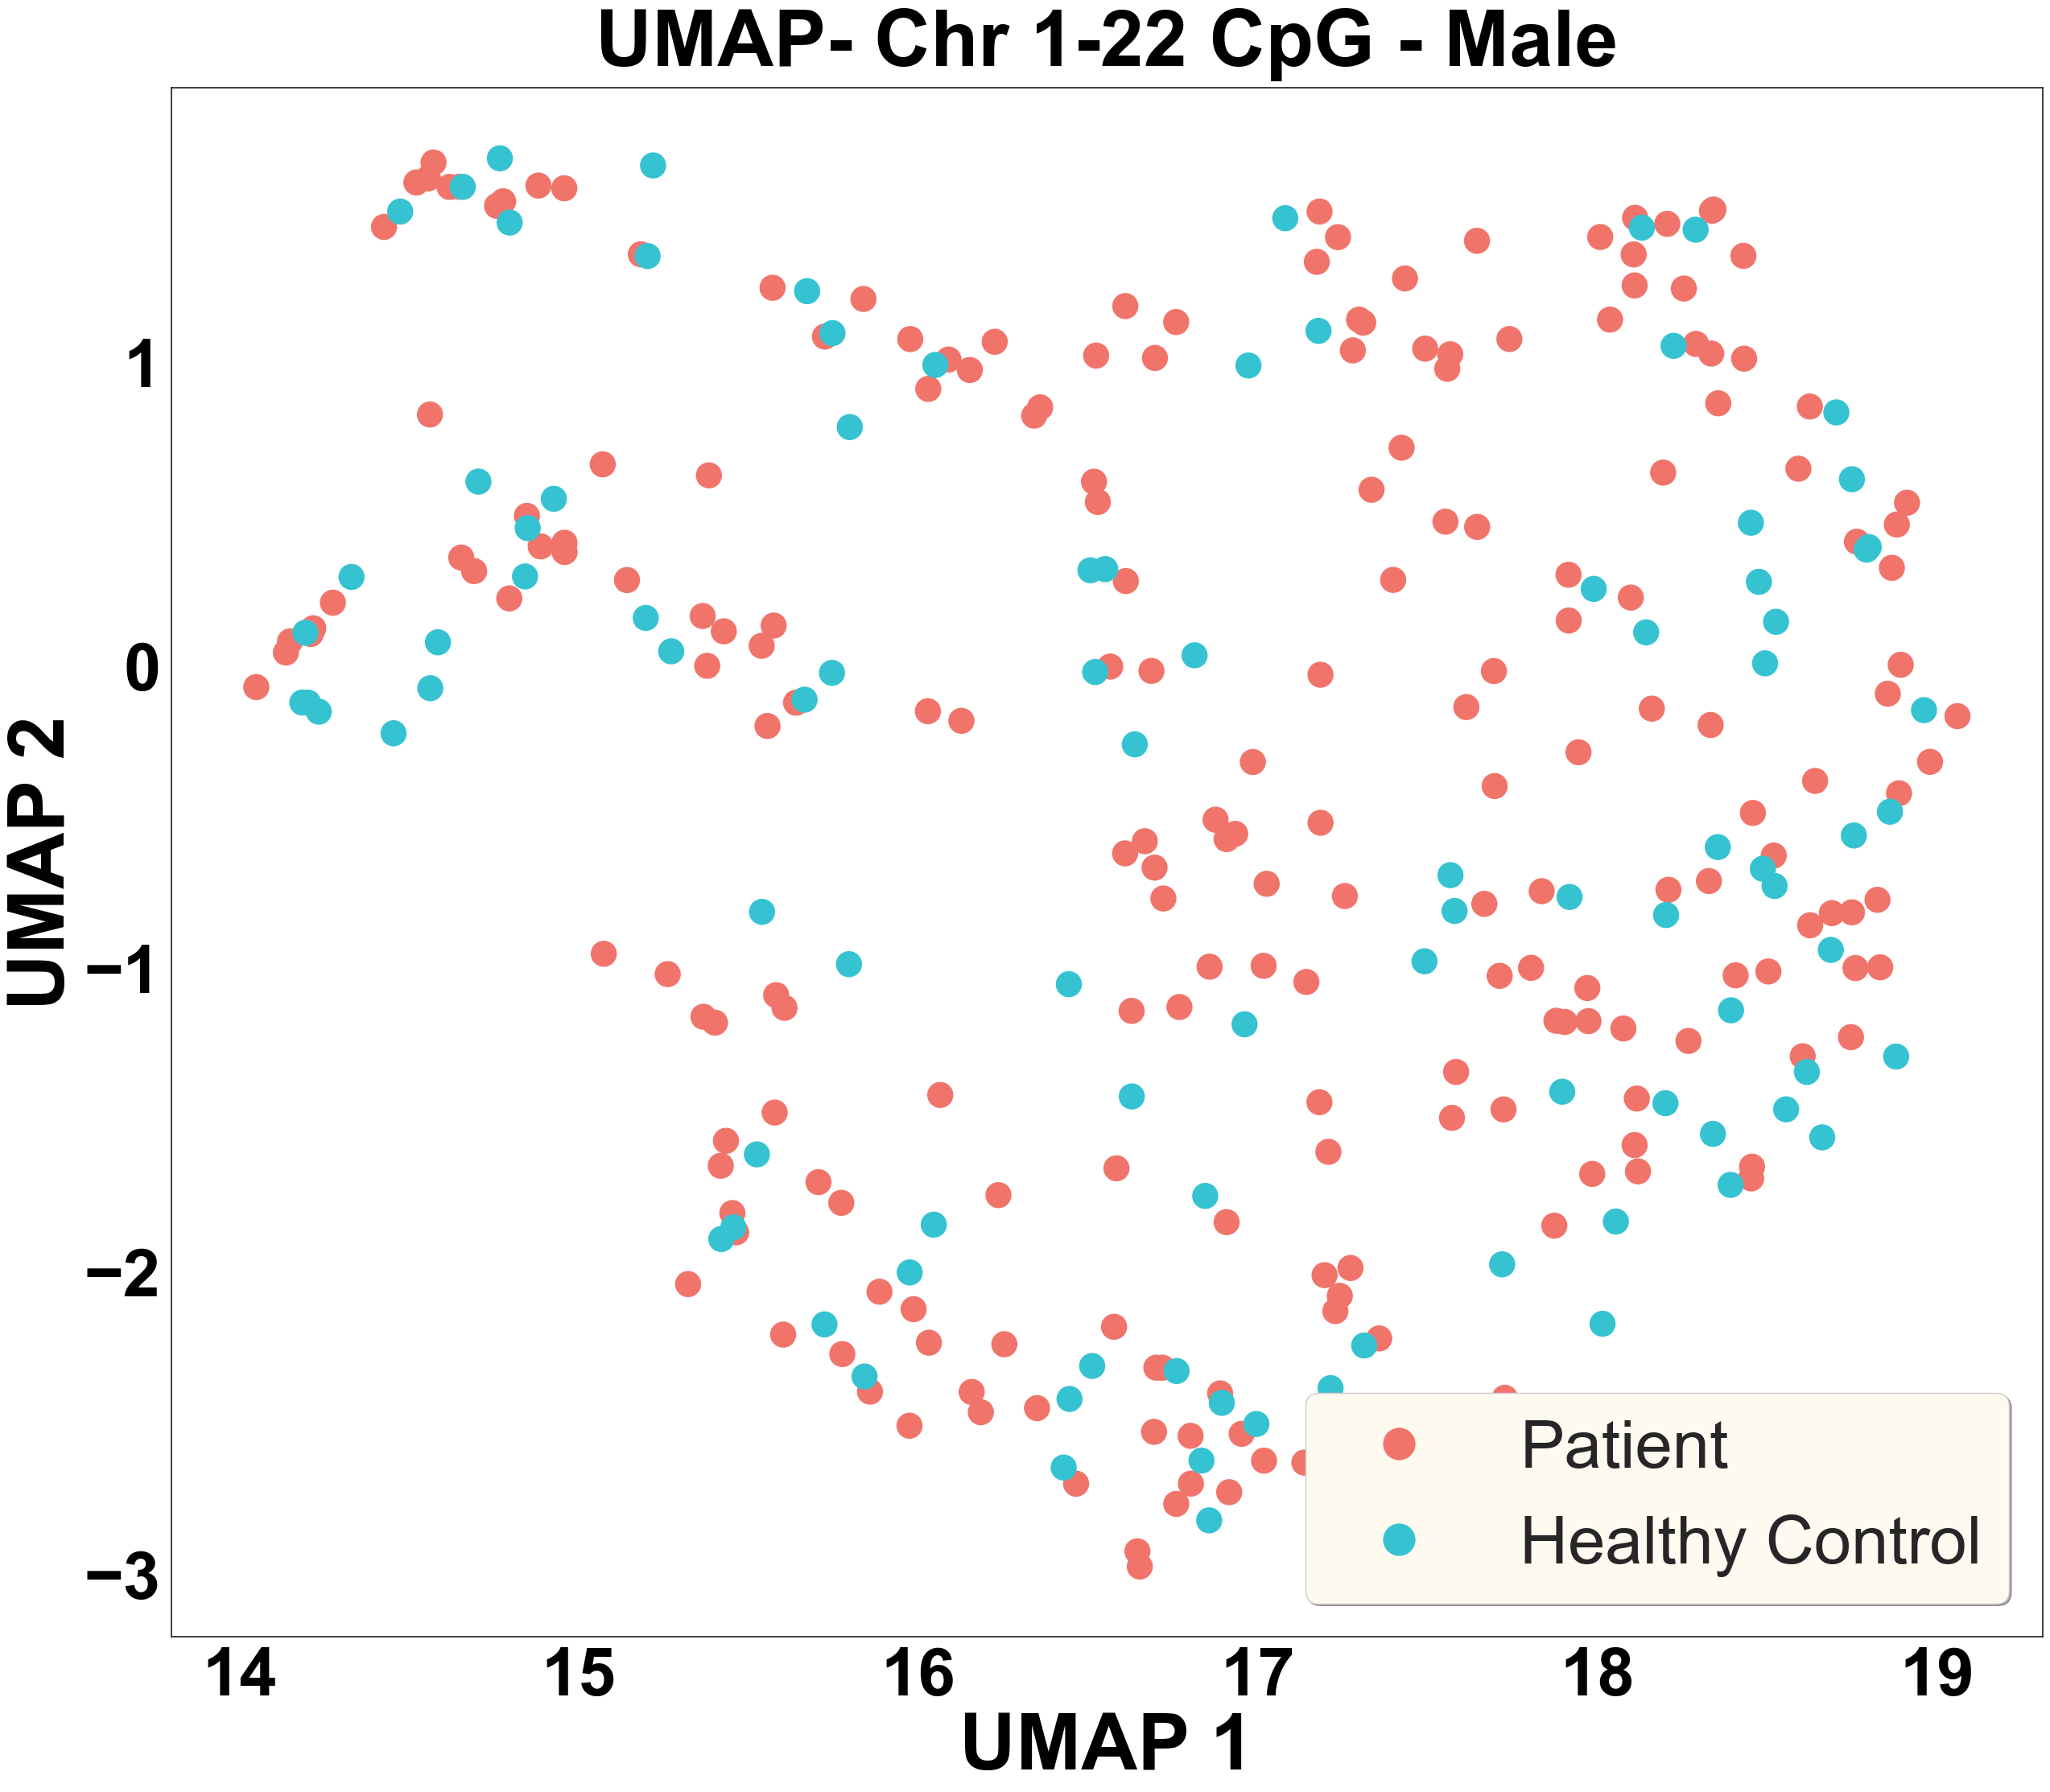

In [21]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=500, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.xlabel('UMAP 1', fontsize=70, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=70, fontweight='bold', color='black')
plt.xticks(fontsize=60, fontweight='bold', color='black')
plt.yticks(fontsize=60, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='lower right',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 60})
plt.title(label= "UMAP- Chr 1-22 CpG - Male", fontsize=70, fontweight='bold', color='black', pad= 20)
plt.savefig("UMAP_Chr1_22_CpG_Male.pdf", format="pdf")
plt.savefig("UMAP_Chr1_22_CpG_Male.svg", format="svg")
plt.show()